대부분의 머신러닝을 모듈에 포함하고, 이에 대한 예제와 정보가 담겨있는 웹사이트 참고: https://scikit-learn.org

# 1. 데이터 전처리 및 데이터 파악

- scikit-lean 패키지에서 데이터와 PCA 로드.

In [4]:
from sklearn import datasets
from sklearn.decomposition import PCA

- 자료 처리에 도움을 줄 pandas, numpy와 시각화를 위한 pyplot, seaborn 로드.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

- iris 데이터를 불러오고, 구조를 살핌.

In [5]:
iris=datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
irisDF['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

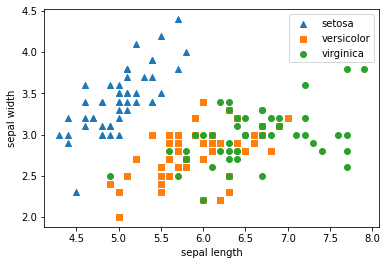

In [8]:
# 시각화

markers=['^', 's', 'o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

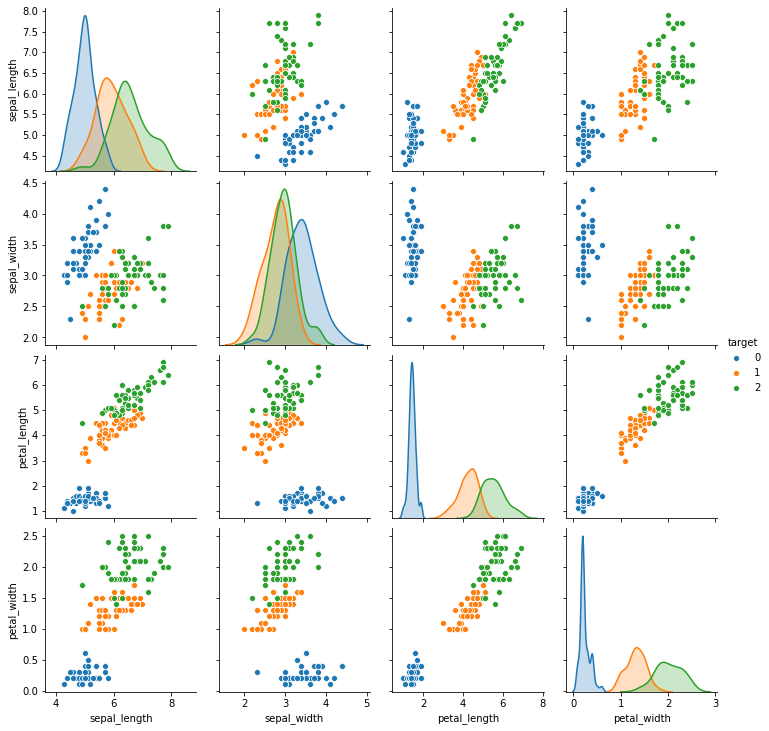

In [282]:
sns.pairplot(irisDF, hue="target")
plt.show()

In [283]:
X=iris.data[:,:]
y=iris.target
x=iris.data[:,:]

In [16]:
x=iris.data[:,:]
nud=x[x>4.0]

In [17]:
print(nud)

[]


In [284]:
print(X.shape)
feature_names=[iris.feature_names[0],iris.feature_names[2]]
df_X=pd.DataFrame(X)
df_X.head()

(150, 4)


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [285]:
print(y.shape)
df_Y=pd.DataFrame(y)
df_Y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


- 결측치 여부를 파악.

In [286]:
print(df_X.isnull().sum())
print(df_Y.isnull().sum())

0    0
1    0
2    0
3    0
dtype: int64
0    0
dtype: int64


- 정규화

In [287]:
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
#iloc[:, :-1] : 마지막꺼 빼고 인덱싱

# 2. PCA 함수 활용 및 아웃풋 의미파악

- PCA 함수를 활용하여 4개 feature를 2개로 줄이고 fit시킴

In [288]:
pca=PCA(n_components=2)
pca.fit(iris_scaled)

PCA(n_components=2)

In [289]:
PCscore=pca.transform(iris_scaled)
print(PCscore.shape)

(150, 2)


- PCscore가 (150,2)니 데이터 프레임으로 만들어서 보기 쉽게 함

In [290]:
#PCA 데이터 set으로 보기 
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(PCscore, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


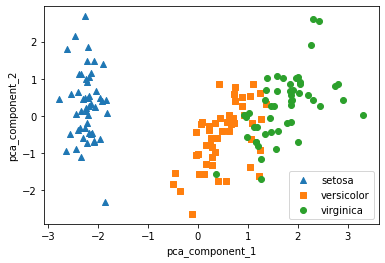

In [291]:
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [292]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 변동성 비율  pca_component_1 이 전체 변동성의 약 73%를 차지하고 두 번째 변환 요소는 22.8%를 차지
- PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명 가능하다.

- 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 최대한 많은 정보를 활용하여 분석할 수 있음.

# LDA

In [293]:
clf= LinearDiscriminantAnalysis()
clf.fit(X,y)

LinearDiscriminantAnalysis()

In [294]:
print(clf.predict([[5.4, 3.0, 1.3, 0.2]]))

[0]


In [295]:
print(clf.predict([[0.8, 1,0.5,0.4]]))

[1]


In [296]:
# 정규화
iris_scaled = StandardScaler().fit_transform(iris.data)

iris_scaled: 정규화된 iris 데이터

columns = ['sepal_length','sepal_width','petal_length','petal_width']

In [297]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

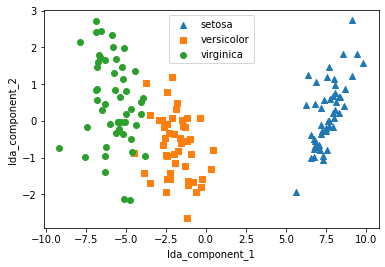

In [300]:
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='best')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# QDA

In [301]:
clf2=QuadraticDiscriminantAnalysis()
clf2.fit(X,y)

QuadraticDiscriminantAnalysis()

In [302]:
print(clf2.predict([[0.8, 1,0.5,0.4]]))

[2]


In [303]:
print(clf.predict([[5.4, 3.0, 1.3, 0.2]]))

[0]


In [333]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(iris_scaled, iris.target)
iris_qda = iris_scaled


qda_columns=['qda_component_1','qda_component_2','qda_component_3','qda_component_4']
irisDF_qda = pd.DataFrame(iris_qda,columns=qda_columns)
irisDF_qda['target']=iris.target


In [322]:
irisDF_qda

,qda_component_1,qda_component_2,qda_component_3,qda_component_4,target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [334]:
irisDF_lda

,lda_component_1,lda_component_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0
...,...,...,...
145,-5.645003,1.677717,2
146,-5.179565,-0.363475,2
147,-4.967741,0.821141,2
148,-5.886145,2.345091,2


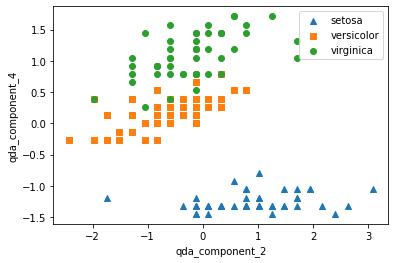

In [331]:
%matplotlib inline

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_qda[irisDF_qda['target']==i]['qda_component_2']
    y_axis_data = irisDF_qda[irisDF_qda['target']==i]['qda_component_4']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='best')
plt.xlabel('qda_component_2')
plt.ylabel('qda_component_4')
plt.show()

 # LDA QDA 비교


In [308]:
#LDA

y_pred=clf.predict(X)
confusion_matrix(y,y_pred)  

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [309]:
#QDA
y_QDA=clf2.predict(X)
confusion_matrix(y,y_QDA)  

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [310]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_QDA, y))
#분류 결과

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.98      0.97        49
           2       0.98      0.96      0.97        51

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



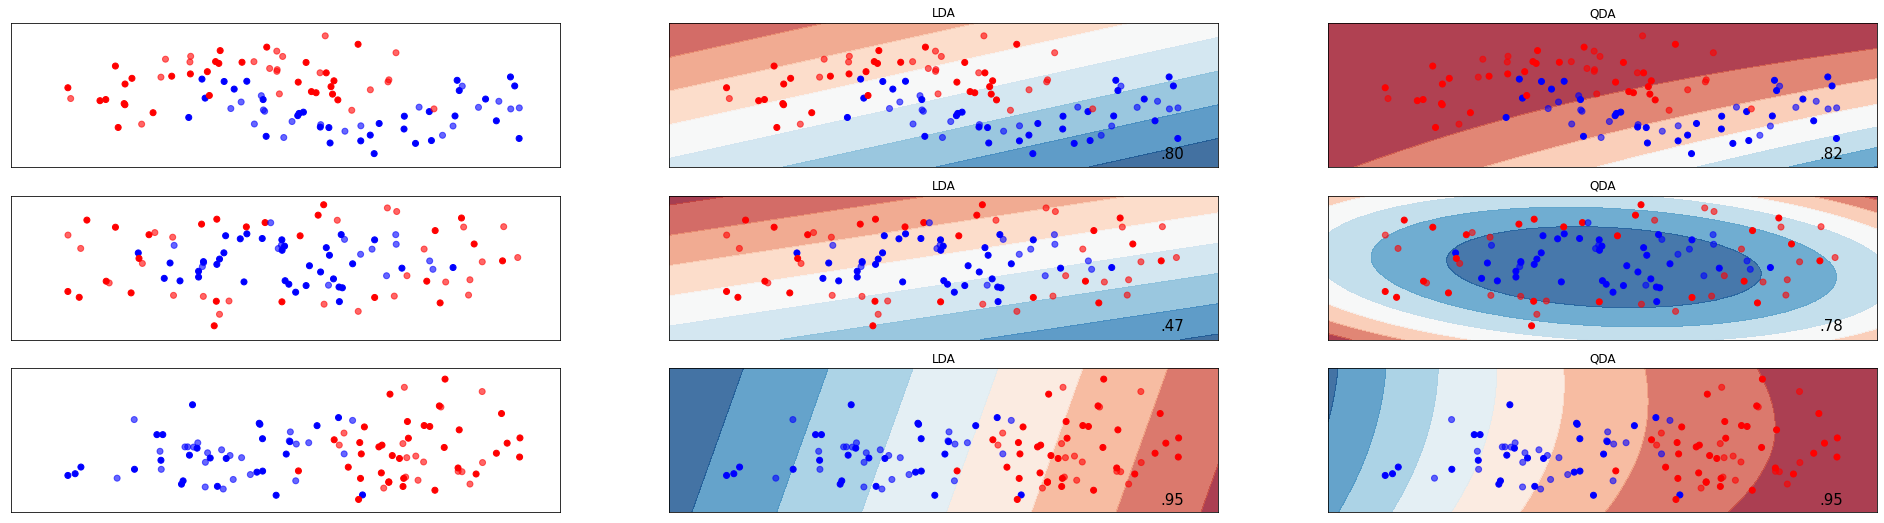

In [311]:
h=0.2
names = ["LDA", "QDA"]
classifiers = [
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1


# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()